In [45]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score,recall_score, precision_score,f1_score
import pandas as pd
from sklearn.datasets import load_iris ##
import os
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
import cv2
from keras.models import load_model

## Directory

In [100]:
# base_dir = ("/Users/Hyunjee/Desktop/AMLS_19-20_HYUNJEE_KIM_SN16075203/B1")
# os.chdir(base_dir)

base_dir = os.getcwd()

dataset_dir = os.path.join(base_dir, 'img')
labels_filename = os.path.join(base_dir, 'labels.csv')



## Data Preparation

In [101]:
def data_frame_B1 (labels_filename):
    df = pd.read_csv(labels_filename)
    df.columns=['original']
    df["file_name"] = df['original'].str.split("\t").str[3]
    df["faceShape_label"] = df['original'].str.split("\t").str[2]
    del df['original']
    return df
    
    



In [102]:
df = data_frame_B1(labels_filename)
df

file_name faceShape_label
0        0.png               4
1        1.png               4
2        2.png               3
3        3.png               0
4        4.png               2
...        ...             ...
9995  9995.png               2
9996  9996.png               3
9997  9997.png               2
9998  9998.png               2
9999  9999.png               2

[10000 rows x 2 columns]

In [15]:
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras import models
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.optimizers import adam
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [16]:
def split_data_B1(df):

    train_data, test_data = train_test_split(df, random_state=0)
    
    return train_data, test_data

In [17]:
train_data, test_data = split_data_B1(df)

In [57]:
# Setup the data generator
data_generator = ImageDataGenerator(
    rescale = 1./255.,
    validation_split = 0.25,
    horizontal_flip=True,
    vertical_flip=True
    
)
    
# Get batches of training dataset from the dataframe
print("Training Dataset Preparation")
train_generator = data_generator.flow_from_dataframe(
        dataframe = train_data, directory = dataset_dir,
        x_col = "file_name", y_col = "faceShape_label",
        class_mode = 'categorical', target_size = (32,32),
        batch_size = 64, subset = 'training')
    
    # Get batches of validation dataset from the dataframe
print("\nValidation Dataset Preparation")
validation_generator = data_generator.flow_from_dataframe(
        dataframe = train_data, directory = dataset_dir,
        x_col = "file_name", y_col = "faceShape_label",
        class_mode = 'categorical', target_size = (32,32),
        batch_size = 64, subset = 'validation')
    
    
    

Training Dataset Preparation
Found 5625 validated image filenames belonging to 5 classes.

Validation Dataset Preparation
Found 1875 validated image filenames belonging to 5 classes.


## CNN Architecture

In [58]:
# starting point 
model= models.Sequential()

# Add first convolutional block
model.add(Conv2D(24, (3, 3), activation='relu', padding='same',input_shape=(32,32,3)))

model.add(MaxPooling2D((2, 2), padding='same'))

# second block
model.add(Conv2D(48, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
# third block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
# fourth block
model.add(Conv2D(96, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))


model.add(Flatten())
model.add(Dense(5, activation='softmax'))




# Show a summary of the model. Check the number of trainable parameters
model.summary()




Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 24)        672       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 24)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 48)        10416     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 48)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 64)          27712     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 96)         

In [59]:
# use early stopping to optimally terminate training through callbacks
# from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
# es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# # save best model automatically
# mc= ModelCheckpoint('/Users/Hyunjee/Desktop/AMLS_19-20_HYUNJEE_KIM_SN16075203/B1/model_B1.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# cb_list=[es,mc]


# compile model 
opt_adam = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])



In [60]:
history = model.fit_generator(
        train_generator,
        epochs=25,
        steps_per_epoch=train_generator.samples // 64,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // 64)
#         callbacks=cb_list)

Epoch 1/25
87/87 [==============================] - 106s 1s/step - loss: 1.6132 - accuracy: 0.1969 - val_loss: 1.6094 - val_accuracy: 0.1913

Epoch 00001: val_loss improved from inf to 1.60941, saving model to /Users/Hyunjee/Desktop/AMLS_19-20_HYUNJEE_KIM_SN16075203/B1/model_B1.h5
Epoch 2/25
87/87 [==============================] - 136s 2s/step - loss: 1.6088 - accuracy: 0.2150 - val_loss: 1.6096 - val_accuracy: 0.2844

Epoch 00002: val_loss did not improve from 1.60941
Epoch 3/25
87/87 [==============================] - 110s 1s/step - loss: 1.4659 - accuracy: 0.3290 - val_loss: 1.1909 - val_accuracy: 0.4219

Epoch 00003: val_loss improved from 1.60941 to 1.19088, saving model to /Users/Hyunjee/Desktop/AMLS_19-20_HYUNJEE_KIM_SN16075203/B1/model_B1.h5
Epoch 4/25
87/87 [==============================] - 106s 1s/step - loss: 1.0049 - accuracy: 0.5501 - val_loss: 0.7020 - val_accuracy: 0.6516

Epoch 00004: val_loss improved from 1.19088 to 0.70204, saving model to /Users/Hyunjee/Desktop/AM

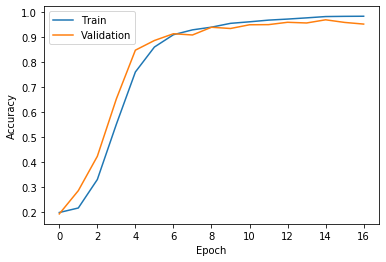

In [61]:
# plot accuracy score for trainig and validation
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.ylim([.5,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("model_B1_1.png", dpi=300)

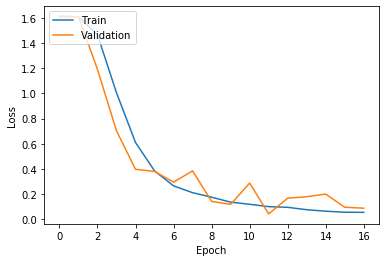

In [62]:
# plot loss for trainig and validation
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.ylim([.5,1.1])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("model_B1_2.png", dpi=300)

## Model Evaluation 


In [103]:
from keras.models import load_model

print("Test Dataset Preparataion")
test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_dataframe(
        dataframe = train_data, directory = dataset_dir,
        x_col = "file_name", y_col = "faceShape_label",
        class_mode = 'categorical', target_size = (32,32),
        batch_size =1, shuffle = False)

file_names = test_generator.filenames
sample_size = len(file_names)

model_path = os.getcwd() + '/model_B1.h5'
saved_model = load_model(model_path)

model_pred_test = saved_model.predict_generator(test_generator, sample_size)


Test Dataset Preparataion
Found 7500 validated image filenames belonging to 5 classes.


## Confusion Matrix

Confusion matrix, without normalization
[[1431   40    0   15    5]
 [  14 1497    0    2    1]
 [   0    0 1475   27    1]
 [  59   16    1 1423   16]
 [   5   33    0   18 1421]]
Normalized confusion matrix
[[9.60e-01 2.68e-02 0.00e+00 1.01e-02 3.35e-03]
 [9.25e-03 9.89e-01 0.00e+00 1.32e-03 6.61e-04]
 [0.00e+00 0.00e+00 9.81e-01 1.80e-02 6.65e-04]
 [3.89e-02 1.06e-02 6.60e-04 9.39e-01 1.06e-02]
 [3.39e-03 2.23e-02 0.00e+00 1.22e-02 9.62e-01]]


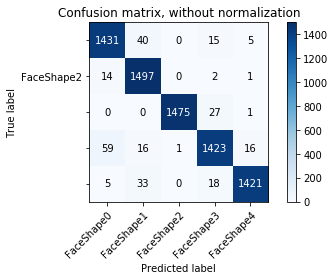

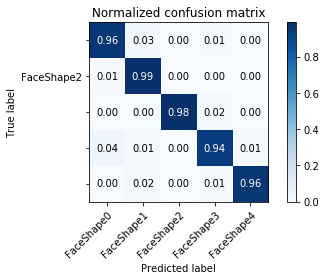

In [93]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = np.array(['FaceShape0', 'FaceShape1','FaceShape2','FaceShape3','FaceShape4'])

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'



    cm = confusion_matrix(true_test, pred_test)
    classes = class_names
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation=None, cmap=cmap)
    
    print(cm)
    ax.figure.colorbar(im, ax=ax)

    for i in range(len(ax.yaxis.get_major_ticks())):
        ax.yaxis.get_major_ticks()[i].label1.set_visible(False)
        
    for i in [2, 6]:
        ax.yaxis.get_major_ticks()[i].label1.set_visible(True)

        
    ax.set(
        xticks = np.arange(cm.shape[1]),
       # ... and label them with the respective list entries
       #xticklabels=classes, yticklabels=[0, 0, classes[0], 0, 0, 0, classes[1], 0, 0],
       xticklabels=classes, yticklabels=classes,
        #yticklabels=[0, 0, classes[0], 0, 0, 0, classes[1], 0, 0],
       
        title=title,
       ylabel='True label',
       xlabel='Predicted label'
    )
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

pred_test = np.argmax(model_pred_test, axis = 1)
true_test = np.array(test_generator.classes)
# Plot non-normalized confusion matrix
plot_confusion_matrix(true_test, pred_test, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(true_test, pred_test, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Validation Accuracy

In [94]:
acc_comp = accuracy_score(true_test, pred_test)
rec_comp = recall_score(true_test, pred_test, pos_label = 'positive', average ='macro')
prec_comp = precision_score(true_test, pred_test, pos_label = 'positive', average ='macro')
f1_comp = f1_score(true_test, pred_test, pos_label = 'positive', average ='macro')
print("Accuracy :" + str(acc_comp))
print("Precision :" + str(prec_comp))
print("Recall :" + str(rec_comp))
print("F1 Score :" + str(f1_comp))

Accuracy :0.9662666666666667
Precision :0.9667675595334714
Recall :0.9662519690441786
F1 Score :0.966338555117719


/Users/Hyunjee/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


## Train Accuracy

In [95]:
score_generator = data_generator.flow_from_dataframe(
        dataframe = train_data, directory = dataset_dir,
        x_col = "file_name", y_col = "faceShape_label",
        class_mode = 'categorical', target_size = (32,32),
        batch_size =1, shuffle = False)

train_metric = saved_model.evaluate_generator(score_generator, steps = validation_generator.samples // 32, verbose=1)

print('Train loss: '+ str(train_metric[0]))
print('Train Accuracy: '+ str(train_metric[1]))
      
      
      
      
      

Found 7500 validated image filenames belonging to 5 classes.
58/58 [==============================] - 1s 14ms/step
Train loss: 9.536738616588991e-07
Train Accuracy: 0.9482758641242981


## New Test Dataset Preparation

In [96]:
test_labels_filename_b1

'/Users/Hyunjee/Desktop/AMLS_19-20_HYUNJEE_KIM_SN16075203/Dataset/cartoon_set_test/labels_test.csv'

In [105]:

test_base_dir_b1 = os.getcwd()
test_base_dir_b1 = '/'.join(test_base_dir_b1.split('/')[:-1]) + '/Dataset/cartoon_set_test'

test_dataset_dir_b1 = os.path.join(test_base_dir_b1, 'img')
test_labels_filename_b1 = os.path.join(test_base_dir_b1, 'labels_test.csv')



In [98]:
def test_df_B1 (test_labels_filename):
    df_b1 = pd.read_csv(test_labels_filename)
    df_b1.columns=['original']
    df_b1["file_name"] = df_b1['original'].str.split("\t").str[3]
    df_b1["faceShape_label"] = df_b1['original'].str.split("\t").str[2]
    del df_b1['original']
    return df_b1

new_test_b1 = test_df_B1 (test_labels_filename_b1)
new_test_b1

file_name faceShape_label
0        0.png               1
1        1.png               4
2        2.png               2
3        3.png               2
4        4.png               3
...        ...             ...
2495  2495.png               4
2496  2496.png               4
2497  2497.png               4
2498  2498.png               4
2499  2499.png               4

[2500 rows x 2 columns]

## Test Accuracy

In [99]:
test_score_generator = data_generator.flow_from_dataframe(
        dataframe = new_test_b1, directory = test_dataset_dir_b1,
        x_col = "file_name", y_col = "faceShape_label",
        class_mode = 'categorical', target_size = (32,32),
        batch_size =1, shuffle = False)

new_test_metric = saved_model.evaluate_generator(test_score_generator, steps = validation_generator.samples // 64, verbose=1)

print('Test loss: '+ str(new_test_metric[0]))
print('Test Accuracy: '+ str(new_test_metric[1]))
      
      

Found 2500 validated image filenames belonging to 5 classes.
29/29 [==============================] - 0s 10ms/step
Test loss: 7.629365427419543e-06
Test Accuracy: 1.0
